In [91]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from geopandas.tools import sjoin
from shapely.geometry import Point, mapping,shape

In [92]:
#Importing the median household income dataframe
mhincome = pd.read_csv('2014 Median Household Income.csv', skiprows=[0])

In [93]:
mhincome.columns

Index([u'Id', u'Id2', u'Geography', u'Total; Estimate; Households',
       u'Total; Margin of Error; Households',
       u'Median income (dollars); Estimate; Households',
       u'Median income (dollars); Margin of Error; Households',
       u'Total; Estimate; Households - One race-- - White',
       u'Total; Margin of Error; Households - One race-- - White',
       u'Median income (dollars); Estimate; Households - One race-- - White',
       ...
       u'Median income (dollars); Estimate; PERCENT IMPUTED - Household income in the past 12 months',
       u'Median income (dollars); Margin of Error; PERCENT IMPUTED - Household income in the past 12 months',
       u'Total; Estimate; PERCENT IMPUTED - Family income in the past 12 months',
       u'Total; Margin of Error; PERCENT IMPUTED - Family income in the past 12 months',
       u'Median income (dollars); Estimate; PERCENT IMPUTED - Family income in the past 12 months',
       u'Median income (dollars); Margin of Error; PERCENT IMPUTE

In [94]:
len(mhincome)

2167

In [95]:
mhincome = mhincome[['Id2','Total; Estimate; Households', 'Median income (dollars); Estimate; Households']]

In [96]:
mhincome.columns = [['BoroCT2010', 'Total Households', 'Median Income']]

In [97]:
#The next lines (bewteen 7 and 17) are used for procesing the census ttacys numbers
#to match the shapefile numbers from NYCBytes
mhincome['BoroCT2010'] = mhincome['BoroCT2010'].map(lambda x: str(x)[3:])

In [98]:
mhincome['Borocode'] = mhincome['BoroCT2010'].str[:2]

In [99]:
mhincome['Median Income'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [100]:
mhincome['Median Income'] = mhincome['Median Income'].replace('', 'NaN')

In [101]:
mhincome['Median Income'] = mhincome['Median Income'].astype(float)

In [102]:
mhincome['Total Households'] = mhincome['Total Households'].astype(float)

In [103]:
bcorr = {'05': '2', '47': '3', '61' : '1', '81': '4', '85' : '5'}

In [104]:
mhincome['Borocode2'] = mhincome['Borocode'].map(bcorr)

In [105]:
mhincome['BoroCT2010'] = mhincome['BoroCT2010'].map(lambda x: str(x)[2:])

In [106]:
mhincome['BoroCT2010'] = mhincome.Borocode2 + mhincome.BoroCT2010.astype(str)

In [107]:
mhincome = mhincome[['BoroCT2010', 'Total Households', 'Median Income']]

In [108]:
mhincome.tail()

,BoroCT2010,Total Households,Median Income
2162,5030302,1938.0,80887.0
2163,5031901,1086.0,27031.0
2164,5031902,1619.0,31750.0
2165,5032300,464.0,58804.0
2166,5990100,0.0,NaN


In [109]:
#Importing the car ownership data
carowner = pd.read_csv('2014 Car Ownership.csv', skiprows=[0])

In [110]:
carowner.columns

Index([u'Id', u'Id2', u'Geography',
       u'Estimate; Aggregate number of vehicles available:',
       u'Margin of Error; Aggregate number of vehicles available:',
       u'Estimate; Aggregate number of vehicles available: - Owner occupied',
       u'Margin of Error; Aggregate number of vehicles available: - Owner occupied',
       u'Estimate; Aggregate number of vehicles available: - Renter occupied',
       u'Margin of Error; Aggregate number of vehicles available: - Renter occupied'],
      dtype='object')

In [111]:
carowner = carowner[['Id2','Estimate; Aggregate number of vehicles available:']]

In [112]:
carowner.columns = [['BoroCT2010', 'Total cars']]

In [113]:
# Same procedure to match the census tracts numbers from census to the NYCbytes
#numbers
carowner['BoroCT2010'] = carowner['BoroCT2010'].map(lambda x: str(x)[3:])

In [114]:
carowner['Borocode'] = carowner['BoroCT2010'].str[:2]

In [115]:
carowner.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [116]:
carowner = carowner.replace('', 'NaN')

In [117]:
carowner['Borocode2'] = carowner['Borocode'].map(bcorr)

In [118]:
carowner.head()

,BoroCT2010,Total cars,Borocode,Borocode2
0,05000100,NaN,05,2
1,05000200,1709,05,2
2,05000400,1872,05,2
3,05001600,1294,05,2
4,05001900,354,05,2


In [119]:
carowner['BoroCT2010'] = carowner['BoroCT2010'].map(lambda x: str(x)[2:])

In [120]:
carowner['BoroCT2010'] = carowner.Borocode2.astype(str) + carowner.BoroCT2010.astype(str)

In [121]:
carowner = carowner[['BoroCT2010', 'Total cars']]

In [122]:
len(carowner)

2083

In [123]:
carowner['Total cars'] = carowner['Total cars'].astype(float)

In [124]:
carowner.tail()

,BoroCT2010,Total cars
2078,5030302,2860.0
2079,5031901,691.0
2080,5031902,1396.0
2081,5032300,578.0
2082,5990100,NaN


In [125]:
#Importing education level data
education = pd.read_csv('2014 Education level.csv', skiprows=[0])

In [126]:
education.columns

Index([u'Id', u'Id2', u'Geography', u'Estimate; Total:',
       u'Margin of Error; Total:',
       u'Estimate; Total: - No schooling completed',
       u'Margin of Error; Total: - No schooling completed',
       u'Estimate; Total: - Nursery school',
       u'Margin of Error; Total: - Nursery school',
       u'Estimate; Total: - Kindergarten',
       u'Margin of Error; Total: - Kindergarten',
       u'Estimate; Total: - 1st grade', u'Margin of Error; Total: - 1st grade',
       u'Estimate; Total: - 2nd grade', u'Margin of Error; Total: - 2nd grade',
       u'Estimate; Total: - 3rd grade', u'Margin of Error; Total: - 3rd grade',
       u'Estimate; Total: - 4th grade', u'Margin of Error; Total: - 4th grade',
       u'Estimate; Total: - 5th grade', u'Margin of Error; Total: - 5th grade',
       u'Estimate; Total: - 6th grade', u'Margin of Error; Total: - 6th grade',
       u'Estimate; Total: - 7th grade', u'Margin of Error; Total: - 7th grade',
       u'Estimate; Total: - 8th grade', u'Mar

In [127]:
education = education[[1, 3, 35, 45, 47, 51]]

In [128]:
education.columns = [['BoroCT2010', 'Total educated', 'Total High School', 'Total bachelors', "Total masters", 'Total PHD']]

In [129]:
len(education)

2167

In [130]:
education.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [131]:
education = education.replace('', 'NaN')

In [132]:
education = education.astype(float)

In [133]:
education['BoroCT2010'] = mhincome['BoroCT2010']

In [134]:
education.tail()

,BoroCT2010,Total educated,Total High School,Total bachelors,Total masters,Total PHD
2162,5030302,4038.0,1065.0,746.0,393.0,74.0
2163,5031901,1709.0,395.0,240.0,24.0,0.0
2164,5031902,2664.0,835.0,435.0,129.0,0.0
2165,5032300,826.0,195.0,111.0,19.0,0.0
2166,5990100,0.0,0.0,0.0,0.0,0.0


In [135]:
#Import median age dataframe
age = pd.read_csv('2014 estimated age.csv', skiprows=[0])
age.columns

Index([u'Id', u'Id2', u'Geography', u'Total; Estimate; Total population',
       u'Total; Margin of Error; Total population',
       u'Male; Estimate; Total population',
       u'Male; Margin of Error; Total population',
       u'Female; Estimate; Total population',
       u'Female; Margin of Error; Total population',
       u'Total; Estimate; AGE - Under 5 years',
       ...
       u'Male; Estimate; PERCENT IMPUTED - Sex',
       u'Male; Margin of Error; PERCENT IMPUTED - Sex',
       u'Female; Estimate; PERCENT IMPUTED - Sex',
       u'Female; Margin of Error; PERCENT IMPUTED - Sex',
       u'Total; Estimate; PERCENT IMPUTED - Age',
       u'Total; Margin of Error; PERCENT IMPUTED - Age',
       u'Male; Estimate; PERCENT IMPUTED - Age',
       u'Male; Margin of Error; PERCENT IMPUTED - Age',
       u'Female; Estimate; PERCENT IMPUTED - Age',
       u'Female; Margin of Error; PERCENT IMPUTED - Age'],
      dtype='object', length=219)

In [136]:
age = age[['Id2', 'Total; Estimate; SUMMARY INDICATORS - Median age (years)']]

In [137]:
age.columns = [['BoroCT2010', 'Median Age']]

In [138]:
len(age)

2167

In [139]:
age.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [140]:
age = age.replace('', 'NaN')

In [141]:
age = age.astype(float)/10

In [142]:
age['BoroCT2010'] = mhincome['BoroCT2010']

In [143]:
age.tail()

,BoroCT2010,Median Age
2162,5030302,36.5
2163,5031901,30.8
2164,5031902,30.6
2165,5032300,42.0
2166,5990100,NaN


In [144]:
#Import type of household (family or non-family) 
housetype = pd.read_csv('2014 Household Type.csv', skiprows=[0])
housetype.columns

Index([u'Id', u'Id2', u'Geography', u'Estimate; Total:',
       u'Margin of Error; Total:', u'Estimate; Family households:',
       u'Margin of Error; Family households:',
       u'Estimate; Family households: - 2-person household',
       u'Margin of Error; Family households: - 2-person household',
       u'Estimate; Family households: - 3-person household',
       u'Margin of Error; Family households: - 3-person household',
       u'Estimate; Family households: - 4-person household',
       u'Margin of Error; Family households: - 4-person household',
       u'Estimate; Family households: - 5-person household',
       u'Margin of Error; Family households: - 5-person household',
       u'Estimate; Family households: - 6-person household',
       u'Margin of Error; Family households: - 6-person household',
       u'Estimate; Family households: - 7-or-more person household',
       u'Margin of Error; Family households: - 7-or-more person household',
       u'Estimate; Nonfamily household

In [145]:
housetype = housetype[['Id2', 'Estimate; Total:', 'Estimate; Family households:', 'Estimate; Nonfamily households:']]

In [146]:
housetype.columns = ['BoroCT2010', 'Total households' , 'Total family households', 'Total non-family households']

In [147]:
len(housetype)

2167

In [148]:
housetype.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [149]:
housetype = housetype.replace('', 'NaN')

In [150]:
housetype = housetype.astype(float)

In [151]:
housetype['BoroCT2010'] = mhincome['BoroCT2010']

In [152]:
housetype.tail()

,BoroCT2010,Total households,Total family households,Total non-family households
2162,5030302,1938.0,1622.0,316.0
2163,5031901,1086.0,837.0,249.0
2164,5031902,1619.0,1171.0,448.0
2165,5032300,464.0,335.0,129.0
2166,5990100,0.0,0.0,0.0


In [153]:
housevalue = pd.read_csv('2014 Median House Value.csv', skiprows=[0])
housevalue.columns

Index([u'Id', u'Id2', u'Geography', u'Estimate; Median value (dollars)',
       u'Margin of Error; Median value (dollars)'],
      dtype='object')

In [154]:
housevalue = housevalue[['Id2', 'Estimate; Median value (dollars)']]

In [155]:
housevalue.columns = ['BoroCT2010', 'Median House Value']

In [156]:
len(housevalue)

2167

In [157]:
housevalue.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [158]:
housevalue = housevalue.replace('', 'NaN')

In [159]:
housevalue = housevalue.astype(float)

In [160]:
housevalue['BoroCT2010'] = mhincome['BoroCT2010']

In [161]:
housevalue.tail()

,BoroCT2010,Median House Value
2162,5030302,321700.0
2163,5031901,344600.0
2164,5031902,312700.0
2165,5032300,186600.0
2166,5990100,NaN


In [162]:
#Importing type of resident data (owner vs renter)
ownorrent = pd.read_csv('2014 Owner and renter units.csv', skiprows=[0])
ownorrent.columns

Index([u'Id', u'Id2', u'Geography', u'Estimate; Total:',
       u'Margin of Error; Total:', u'Estimate; Total: - Owner occupied',
       u'Margin of Error; Total: - Owner occupied',
       u'Estimate; Total: - Renter occupied',
       u'Margin of Error; Total: - Renter occupied'],
      dtype='object')

In [163]:
ownorrent = ownorrent[['Id2', 'Estimate; Total:', 'Estimate; Total: - Owner occupied', 'Estimate; Total: - Renter occupied' ]]

In [164]:
ownorrent.columns = ['BoroCT2010', 'Total Hunits' , 'Owner Occupied' , 'Renter Occupied']

In [165]:
len(ownorrent)

2167

In [166]:
ownorrent.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [167]:
ownorrent = ownorrent.replace('', 'NaN')

In [168]:
ownorrent = ownorrent.astype(float)

In [169]:
ownorrent['BoroCT2010'] = mhincome['BoroCT2010']

In [170]:
ownorrent.tail()

,BoroCT2010,Total Hunits,Owner Occupied,Renter Occupied
2162,5030302,6205.0,4159.0,2046.0
2163,5031901,2916.0,592.0,2324.0
2164,5031902,4514.0,2359.0,2155.0
2165,5032300,1106.0,853.0,253.0
2166,5990100,0.0,0.0,0.0


In [171]:
#Import population data
population = pd.read_csv('2014 population.csv', skiprows=[0])
population.columns

Index([u'Id', u'Id2', u'Geography', u'Estimate; Total',
       u'Margin of Error; Total'],
      dtype='object')

In [172]:
population = population[['Id2', 'Estimate; Total']]

In [173]:
population.columns = ['BoroCT2010', 'Total Population']

In [174]:
population.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [175]:
population = population.replace('', 'NaN')

In [176]:
population = population.astype(float)

In [177]:
population['BoroCT2010'] = mhincome['BoroCT2010']

In [178]:
population.tail()

,BoroCT2010,Total Population
2162,5030302,6205.0
2163,5031901,2916.0
2164,5031902,4535.0
2165,5032300,1106.0
2166,5990100,0.0


In [179]:
#Import race data
race = pd.read_csv('2014 Race and sex.csv', skiprows=[1])
race.columns

Index([u'GEO.id', u'GEO.id2', u'GEO.display-label', u'HC01_VC03', u'HC02_VC03',
       u'HC03_VC03', u'HC04_VC03', u'HC01_VC04', u'HC02_VC04', u'HC03_VC04',
       ...
       u'HC03_VC101', u'HC04_VC101', u'HC01_VC102', u'HC02_VC102',
       u'HC03_VC102', u'HC04_VC102', u'HC01_VC104', u'HC02_VC104',
       u'HC03_VC104', u'HC04_VC104'],
      dtype='object', length=327)

In [180]:
race = race[['GEO.id2', 'HC03_VC87', 'HC01_VC94', 'HC01_VC95', 'HC01_VC97', 'HC01_VC88']]

In [181]:
race.columns = ['BoroCT2010', 'Total Population', 'White only', 'Black only', 'Asian only', 'Hispanic only']

In [182]:
race.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [183]:
race = race.replace('', 'NaN')

In [184]:
race = race.astype(float)

In [185]:
len(race)

2167

In [186]:
race['BoroCT2010'] = mhincome['BoroCT2010']

In [187]:
race['Other Only'] = race['Total Population'] - race['White only'] - race['Black only'] - race['Asian only'] - race['Hispanic only']

In [188]:
del(race['Total Population'])

In [189]:
race.head()

,BoroCT2010,White only,Black only,Asian only,Hispanic only,Other Only
0,2000100,585.0,4647.0,167.0,2943.0,88.0
1,2000200,115.0,1041.0,331.0,3505.0,103.0
2,2000400,160.0,1709.0,21.0,3533.0,149.0
3,2001600,75.0,1609.0,0.0,3694.0,34.0
4,2001900,209.0,705.0,39.0,1509.0,107.0


In [190]:
#Import median rent data
mrent = pd.read_csv('2014 Median rent.csv', skiprows=[1])
mrent.columns

Index([u'GEO.id', u'GEO.id2', u'GEO.display-label', u'HC01_VC03', u'HC02_VC03',
       u'HC03_VC03', u'HC04_VC03', u'HC01_VC04', u'HC02_VC04', u'HC03_VC04',
       ...
       u'HC03_VC201', u'HC04_VC201', u'HC01_VC202', u'HC02_VC202',
       u'HC03_VC202', u'HC04_VC202', u'HC01_VC205', u'HC02_VC205',
       u'HC03_VC205', u'HC04_VC205'],
      dtype='object', length=567)

In [191]:
mrent = mrent[['GEO.id2', 'HC01_VC189']]

In [192]:
mrent.columns = ['BoroCT2010', 'Median Rent']

In [193]:
mrent.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [194]:
mrent = mrent.replace('', 'NaN')

In [195]:
mrent = mrent.astype(float)

In [196]:
len(mrent)

2167

In [197]:
mrent['BoroCT2010'] = mhincome['BoroCT2010']

In [198]:
mrent.tail()

,BoroCT2010,Median Rent
2162,5030302,1650.0
2163,5031901,603.0
2164,5031902,754.0
2165,5032300,1281.0
2166,5990100,NaN


In [199]:
#Importing 311 total call by Census Tracts
tcomplaints = pd.read_csv('2014 total complaints by CT.csv')
tcomplaints.columns = ['BoroCT2010', '311 calls']
tcomplaints.BoroCT2010 = tcomplaints.BoroCT2010.astype(str)

In [200]:
#The next lones (100 to 108) are created to merge all the demographic data sets
#with the 311 call data
merged = pd.merge(tcomplaints, mhincome, on='BoroCT2010')

In [201]:
merged = pd.merge(merged, education, on='BoroCT2010')

In [202]:
merged = pd.merge(merged, age, on='BoroCT2010')

In [203]:
merged = pd.merge(merged, housetype, on='BoroCT2010')

In [204]:
merged = pd.merge(merged, housevalue, on='BoroCT2010')

In [205]:
merged = pd.merge(merged, ownorrent, on='BoroCT2010')

In [206]:
merged = pd.merge(merged, population, on='BoroCT2010')

In [207]:
merged = pd.merge(merged, race, on='BoroCT2010')

In [208]:
merged = pd.merge(merged, mrent, on='BoroCT2010')

In [209]:
merged = pd.merge(merged, carowner, on='BoroCT2010', how='left')

In [210]:
merged.tail()

,BoroCT2010,311 calls,Total Households,Median Income,Total educated,Total High School,Total bachelors,Total masters,Total PHD,Median Age,...,Owner Occupied,Renter Occupied,Total Population,White only,Black only,Asian only,Hispanic only,Other Only,Median Rent,Total cars
2157,5030301,736,1820.0,59625.0,3124.0,984.0,455.0,257.0,20.0,32.2,...,2904.0,2152.0,5061.0,2393.0,545.0,656.0,1391.0,76.0,1294.0,2326.0
2158,5030302,859,1938.0,80887.0,4038.0,1065.0,746.0,393.0,74.0,36.5,...,4159.0,2046.0,6205.0,1480.0,1373.0,889.0,2293.0,170.0,1650.0,2860.0
2159,5031901,350,1086.0,27031.0,1709.0,395.0,240.0,24.0,0.0,30.8,...,592.0,2324.0,2916.0,132.0,1743.0,140.0,888.0,13.0,603.0,691.0
2160,5031902,1126,1619.0,31750.0,2664.0,835.0,435.0,129.0,0.0,30.6,...,2359.0,2155.0,4535.0,654.0,2900.0,16.0,920.0,45.0,754.0,1396.0
2161,5032300,320,464.0,58804.0,826.0,195.0,111.0,19.0,0.0,42.0,...,853.0,253.0,1106.0,345.0,247.0,0.0,508.0,6.0,1281.0,578.0


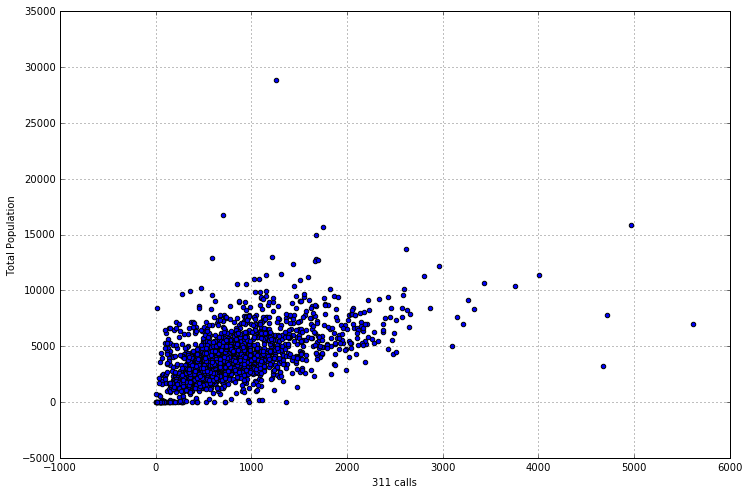

In [211]:
merged.plot(x='311 calls', y='Total Population', kind='scatter', grid=True, figsize=(12,8))

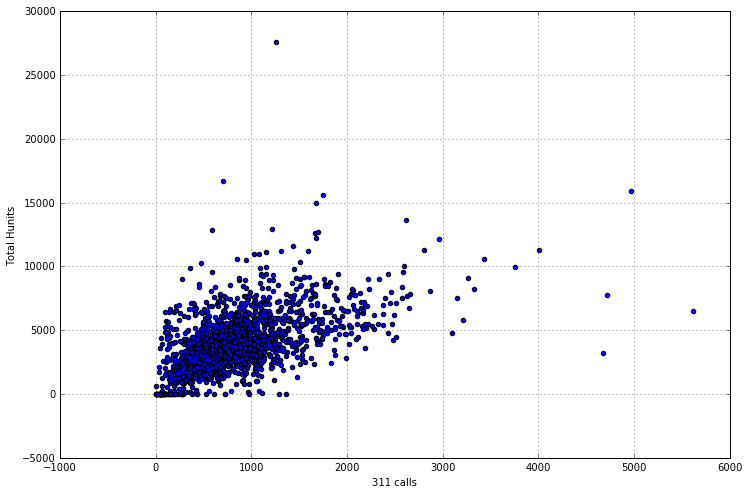

In [212]:
merged.plot(x='311 calls', y='Total Hunits', kind='scatter', grid=True, figsize=(12,8))

In [213]:
NNcorr = merged.corr(method='pearson', min_periods=1)

In [214]:
NNcorr.iloc[0]

311 calls                      1.000000
Total Households               0.550508
Median Income                 -0.087318
Total educated                 0.566597
Total High School              0.376980
Total bachelors                0.384308
Total masters                  0.295561
Total PHD                      0.178182
Median Age                    -0.171611
Total households               0.550508
Total family households        0.502020
Total non-family households    0.470357
Median House Value             0.026866
Total Hunits                   0.588256
Owner Occupied                 0.040398
Renter Occupied                0.612292
Total Population               0.589524
White only                     0.190150
Black only                     0.231715
Asian only                     0.039470
Hispanic only                  0.492669
Other Only                     0.188199
Median Rent                    0.004588
Total cars                     0.105361
Name: 311 calls, dtype: float64

In [215]:
#merged.to_csv('Demographic and 311 calls merged - without normalization.csv')

In [216]:
merged.columns

Index([u'BoroCT2010', u'311 calls', u'Total Households', u'Median Income',
       u'Total educated', u'Total High School', u'Total bachelors',
       u'Total masters', u'Total PHD', u'Median Age', u'Total households',
       u'Total family households', u'Total non-family households',
       u'Median House Value', u'Total Hunits', u'Owner Occupied',
       u'Renter Occupied', u'Total Population', u'White only', u'Black only',
       u'Asian only', u'Hispanic only', u'Other Only', u'Median Rent',
       u'Total cars'],
      dtype='object')

In [217]:
merged.tail()

,BoroCT2010,311 calls,Total Households,Median Income,Total educated,Total High School,Total bachelors,Total masters,Total PHD,Median Age,...,Owner Occupied,Renter Occupied,Total Population,White only,Black only,Asian only,Hispanic only,Other Only,Median Rent,Total cars
2157,5030301,736,1820.0,59625.0,3124.0,984.0,455.0,257.0,20.0,32.2,...,2904.0,2152.0,5061.0,2393.0,545.0,656.0,1391.0,76.0,1294.0,2326.0
2158,5030302,859,1938.0,80887.0,4038.0,1065.0,746.0,393.0,74.0,36.5,...,4159.0,2046.0,6205.0,1480.0,1373.0,889.0,2293.0,170.0,1650.0,2860.0
2159,5031901,350,1086.0,27031.0,1709.0,395.0,240.0,24.0,0.0,30.8,...,592.0,2324.0,2916.0,132.0,1743.0,140.0,888.0,13.0,603.0,691.0
2160,5031902,1126,1619.0,31750.0,2664.0,835.0,435.0,129.0,0.0,30.6,...,2359.0,2155.0,4535.0,654.0,2900.0,16.0,920.0,45.0,754.0,1396.0
2161,5032300,320,464.0,58804.0,826.0,195.0,111.0,19.0,0.0,42.0,...,853.0,253.0,1106.0,345.0,247.0,0.0,508.0,6.0,1281.0,578.0


In [218]:
Normcorr = merged.corr(method='pearson', min_periods=1)

In [219]:
Normcorr.iloc[0]

311 calls                      1.000000
Total Households               0.550508
Median Income                 -0.087318
Total educated                 0.566597
Total High School              0.376980
Total bachelors                0.384308
Total masters                  0.295561
Total PHD                      0.178182
Median Age                    -0.171611
Total households               0.550508
Total family households        0.502020
Total non-family households    0.470357
Median House Value             0.026866
Total Hunits                   0.588256
Owner Occupied                 0.040398
Renter Occupied                0.612292
Total Population               0.589524
White only                     0.190150
Black only                     0.231715
Asian only                     0.039470
Hispanic only                  0.492669
Other Only                     0.188199
Median Rent                    0.004588
Total cars                     0.105361
Name: 311 calls, dtype: float64

In [131]:
merged.to_csv('Demographic and 311 calls merged - 3.csv')

In [220]:
NTAtoCT = pd.read_excel('GeoID to Neighborhoods.xlsx')

In [221]:
NTAtoCT.columns = ['BoroCT2010', 'Neighborhood']

In [222]:
NTAtoCT.head()

,BoroCT2010,Neighborhood
0,36005000100,Rikers Island
1,36005000100,Rikers Island
2,36005000200,Soundview-Castle Hill-Clason Point-Harding Park
3,36005000200,Soundview-Castle Hill-Clason Point-Harding Park
4,36005000200,Soundview-Castle Hill-Clason Point-Harding Park


In [223]:
NTAtoCT['BoroCT2010'] = NTAtoCT['BoroCT2010'].map(lambda x: str(x)[3:])

In [224]:
NTAtoCT['Borocode'] = NTAtoCT['BoroCT2010'].str[:2]

In [225]:
NTAtoCT.Borocode.value_counts()

47    2052
81    1707
05    1138
61    1091
85     307
Name: Borocode, dtype: int64

In [226]:
bcorr = {'05': '2', '47': '3', '61' : '1', '81': '4', '85' : '5'}

In [227]:
NTAtoCT['Borocode2'] = NTAtoCT['Borocode'].map(bcorr)

In [228]:
NTAtoCT['BoroCT2010'] = NTAtoCT['BoroCT2010'].map(lambda x: str(x)[2:])

In [229]:
NTAtoCT['BoroCT2010'] = NTAtoCT.Borocode2 + NTAtoCT.BoroCT2010.astype(str)

In [230]:
NTAtoCT = NTAtoCT[['BoroCT2010', 'Neighborhood']]

In [231]:
NTAtoCT.head()

,BoroCT2010,Neighborhood
0,2000100,Rikers Island
1,2000100,Rikers Island
2,2000200,Soundview-Castle Hill-Clason Point-Harding Park
3,2000200,Soundview-Castle Hill-Clason Point-Harding Park
4,2000200,Soundview-Castle Hill-Clason Point-Harding Park


In [232]:
len(NTAtoCT)

6295

In [233]:
NTAtoCT1 = NTAtoCT.drop_duplicates('BoroCT2010')

In [234]:
len(NTAtoCT1)

2162

In [235]:
NTAtoCT1.to_csv('NTA and CT correspondence.csv')

In [236]:
merged2 = pd.merge(merged, NTAtoCT1, on='BoroCT2010')

In [237]:
len(merged2)

2162

In [238]:
merged2.head()

,BoroCT2010,311 calls,Total Households,Median Income,Total educated,Total High School,Total bachelors,Total masters,Total PHD,Median Age,...,Renter Occupied,Total Population,White only,Black only,Asian only,Hispanic only,Other Only,Median Rent,Total cars,Neighborhood
0,1000201,287,927.0,23036.0,1985.0,479.0,217.0,63.0,0.0,40.3,...,2578.0,2709.0,330.0,145.0,1334.0,882.0,18.0,654.0,NaN,Lower East Side
1,1000202,580,3447.0,29418.0,6073.0,1481.0,959.0,326.0,30.0,44.1,...,6383.0,8308.0,2050.0,753.0,2044.0,3168.0,293.0,621.0,744.0,Lower East Side
2,1000500,8,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,park-cemetery-etc-Manhattan
3,1000600,1151,3954.0,18944.0,8360.0,1177.0,965.0,238.0,23.0,46.3,...,10817.0,11354.0,521.0,983.0,6189.0,3500.0,161.0,589.0,768.0,Lower East Side
4,1000700,1633,4610.0,114519.0,6758.0,103.0,3175.0,1714.0,277.0,28.9,...,6852.0,8598.0,5894.0,284.0,1683.0,574.0,163.0,2000.0,581.0,Battery Park City-Lower Manhattan


In [239]:
merged2.columns

Index([u'BoroCT2010', u'311 calls', u'Total Households', u'Median Income',
       u'Total educated', u'Total High School', u'Total bachelors',
       u'Total masters', u'Total PHD', u'Median Age', u'Total households',
       u'Total family households', u'Total non-family households',
       u'Median House Value', u'Total Hunits', u'Owner Occupied',
       u'Renter Occupied', u'Total Population', u'White only', u'Black only',
       u'Asian only', u'Hispanic only', u'Other Only', u'Median Rent',
       u'Total cars', u'Neighborhood'],
      dtype='object')

In [240]:
Totalsum =  (merged2.groupby(merged2['Neighborhood']).sum())

In [241]:
Totalsum.head()

,311 calls,Total Households,Median Income,Total educated,Total High School,Total bachelors,Total masters,Total PHD,Median Age,Total households,...,Owner Occupied,Renter Occupied,Total Population,White only,Black only,Asian only,Hispanic only,Other Only,Median Rent,Total cars
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Airport,1038,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
Allerton-Pelham Gardens,4727,9587.0,716588.0,23541.0,5773.0,3512.0,1779.0,249.0,437.6,9587.0,...,19280.0,12767.0,33848.0,8785.0,10594.0,2872.0,10633.0,964.0,15574.0,10832.0
Annadale-Huguenot-Prince's Bay-Eltingville,4878,9885.0,524859.0,19861.0,6072.0,4189.0,1670.0,149.0,247.3,9885.0,...,24134.0,4564.0,28853.0,25831.0,151.0,854.0,1820.0,197.0,8259.0,18371.0
Arden Heights,3766,8960.0,359603.0,17883.0,4817.0,3895.0,1782.0,141.0,162.0,8960.0,...,23227.0,2353.0,25602.0,20381.0,362.0,1605.0,3040.0,214.0,5062.0,15606.0
Astoria,14200,34310.0,1314120.0,59888.0,10883.0,16794.0,6921.0,848.0,812.0,34310.0,...,13114.0,63879.0,77095.0,39620.0,3555.0,10772.0,21201.0,1947.0,32028.0,14487.0


In [242]:
Totalsum.columns

Index([u'311 calls', u'Total Households', u'Median Income', u'Total educated',
       u'Total High School', u'Total bachelors', u'Total masters',
       u'Total PHD', u'Median Age', u'Total households',
       u'Total family households', u'Total non-family households',
       u'Median House Value', u'Total Hunits', u'Owner Occupied',
       u'Renter Occupied', u'Total Population', u'White only', u'Black only',
       u'Asian only', u'Hispanic only', u'Other Only', u'Median Rent',
       u'Total cars'],
      dtype='object')

In [243]:
Totalsum = Totalsum[['311 calls', 'Total Households', 'Total educated',
       'Total High School', 'Total bachelors', 'Total masters',
       'Total PHD', 'Total households',
       'Total family households', 'Total non-family households',
       'Total Hunits', 'Owner Occupied',
       'Renter Occupied', 'Total Population', 'White only', 'Black only',
       'Asian only', 'Hispanic only', 'Other Only',
       'Total cars']]

In [244]:
Totalsum.head()

,311 calls,Total Households,Total educated,Total High School,Total bachelors,Total masters,Total PHD,Total households,Total family households,Total non-family households,Total Hunits,Owner Occupied,Renter Occupied,Total Population,White only,Black only,Asian only,Hispanic only,Other Only,Total cars
Neighborhood,,,,,,,,,,,,,,,,,,,,
Airport,1038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
Allerton-Pelham Gardens,4727,9587.0,23541.0,5773.0,3512.0,1779.0,249.0,9587.0,7383.0,2204.0,32047.0,19280.0,12767.0,33848.0,8785.0,10594.0,2872.0,10633.0,964.0,10832.0
Annadale-Huguenot-Prince's Bay-Eltingville,4878,9885.0,19861.0,6072.0,4189.0,1670.0,149.0,9885.0,7896.0,1989.0,28698.0,24134.0,4564.0,28853.0,25831.0,151.0,854.0,1820.0,197.0,18371.0
Arden Heights,3766,8960.0,17883.0,4817.0,3895.0,1782.0,141.0,8960.0,7147.0,1813.0,25580.0,23227.0,2353.0,25602.0,20381.0,362.0,1605.0,3040.0,214.0,15606.0
Astoria,14200,34310.0,59888.0,10883.0,16794.0,6921.0,848.0,34310.0,16041.0,18269.0,76993.0,13114.0,63879.0,77095.0,39620.0,3555.0,10772.0,21201.0,1947.0,14487.0


In [245]:
Totalmedian =  (merged2.groupby(merged2['Neighborhood']).median())

In [246]:
Totalmedian.columns

Index([u'311 calls', u'Total Households', u'Median Income', u'Total educated',
       u'Total High School', u'Total bachelors', u'Total masters',
       u'Total PHD', u'Median Age', u'Total households',
       u'Total family households', u'Total non-family households',
       u'Median House Value', u'Total Hunits', u'Owner Occupied',
       u'Renter Occupied', u'Total Population', u'White only', u'Black only',
       u'Asian only', u'Hispanic only', u'Other Only', u'Median Rent',
       u'Total cars'],
      dtype='object')

In [247]:
Totalmedian = Totalmedian[['Median Income', 'Median House Value', 'Median Rent', 'Median Age']]

In [248]:
Totalmedian.head()

,Median Income,Median House Value,Median Rent,Median Age
Neighborhood,,,,
Airport,NaN,NaN,NaN,NaN
Allerton-Pelham Gardens,64702.0,445200.0,1538.0,39.70
Annadale-Huguenot-Prince's Bay-Eltingville,91354.5,527900.0,1342.0,41.60
Arden Heights,88864.5,409750.0,1299.0,40.45
Astoria,57798.0,637150.0,1432.0,34.10


In [249]:
Neighframe =  pd.concat([Totalsum, Totalmedian], axis=1)

In [250]:
Neighframe.columns

Index([u'311 calls', u'Total Households', u'Total educated',
       u'Total High School', u'Total bachelors', u'Total masters',
       u'Total PHD', u'Total households', u'Total family households',
       u'Total non-family households', u'Total Hunits', u'Owner Occupied',
       u'Renter Occupied', u'Total Population', u'White only', u'Black only',
       u'Asian only', u'Hispanic only', u'Other Only', u'Total cars',
       u'Median Income', u'Median House Value', u'Median Rent', u'Median Age'],
      dtype='object')

In [251]:
Neighframe.head()

,311 calls,Total Households,Total educated,Total High School,Total bachelors,Total masters,Total PHD,Total households,Total family households,Total non-family households,...,White only,Black only,Asian only,Hispanic only,Other Only,Total cars,Median Income,Median House Value,Median Rent,Median Age
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Airport,1038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
Allerton-Pelham Gardens,4727,9587.0,23541.0,5773.0,3512.0,1779.0,249.0,9587.0,7383.0,2204.0,...,8785.0,10594.0,2872.0,10633.0,964.0,10832.0,64702.0,445200.0,1538.0,39.70
Annadale-Huguenot-Prince's Bay-Eltingville,4878,9885.0,19861.0,6072.0,4189.0,1670.0,149.0,9885.0,7896.0,1989.0,...,25831.0,151.0,854.0,1820.0,197.0,18371.0,91354.5,527900.0,1342.0,41.60
Arden Heights,3766,8960.0,17883.0,4817.0,3895.0,1782.0,141.0,8960.0,7147.0,1813.0,...,20381.0,362.0,1605.0,3040.0,214.0,15606.0,88864.5,409750.0,1299.0,40.45
Astoria,14200,34310.0,59888.0,10883.0,16794.0,6921.0,848.0,34310.0,16041.0,18269.0,...,39620.0,3555.0,10772.0,21201.0,1947.0,14487.0,57798.0,637150.0,1432.0,34.10


In [252]:
Neighcorr = Neighframe.corr(method='pearson', min_periods=1)

In [253]:
Neighcorr.iloc[0]

311 calls                      1.000000
Total Households               0.756739
Total educated                 0.770677
Total High School              0.617981
Total bachelors                0.500806
Total masters                  0.401179
Total PHD                      0.300166
Total households               0.756739
Total family households        0.747840
Total non-family households    0.600137
Total Hunits                   0.805907
Owner Occupied                 0.218192
Renter Occupied                0.828035
Total Population               0.808405
White only                     0.254321
Black only                     0.463877
Asian only                     0.149560
Hispanic only                  0.525543
Other Only                     0.343802
Total cars                     0.191377
Median Income                 -0.142043
Median House Value             0.197001
Median Rent                   -0.017759
Median Age                    -0.257040
Name: 311 calls, dtype: float64

In [254]:
#The next lines are going to be used to define the normalization of the demographic
#variables by the factor we decided

#Number of normalized 311 calls (total calls by census tracts / total population by census tracts)
Neighframe['Normalized 311 calls'] =  Neighframe['311 calls']/Neighframe['Total Population']

#Number of normalized cars in each area (total cars by census tracts / total population by census tracts)
Neighframe['Normalized cars'] = Neighframe['Total cars']/Neighframe['Total households']

#Number of normalized educated people by level of education in each area by 1000 people
#(total educated people by level of education by census tracts / total population by census tracts)
# multiplied by 1000
Neighframe['Normalized High school'] = Neighframe['Total High School']/Neighframe['Total Population']*1000
Neighframe['Normalized bachelors'] = Neighframe['Total bachelors']/Neighframe['Total Population']*1000
Neighframe['Normalized masters'] = Neighframe['Total masters']/Neighframe['Total Population']*1000
Neighframe['Normalized PHD'] = Neighframe['Total PHD']/Neighframe['Total Population']*1000

#Number of normalized type of households in each area (total type of household by census tracts / 
#total number of households by census tracts)
Neighframe['Normalized familiy household'] = Neighframe['Total family households']/Neighframe['Total households']
Neighframe['Normalized non-family household'] = Neighframe['Total non-family households']/Neighframe['Total households']

#Number of normalized type of house units in each area (total type of house units by census tracts / 
#total number of house units by census tracts)
Neighframe['Normalized owner ocuppied'] = Neighframe['Owner Occupied']/Neighframe['Total Hunits']
Neighframe['Normalized renter ocuppied'] = Neighframe['Renter Occupied']/Neighframe['Total Hunits']

#Number of normalized type of house units in each area (total type of house units by census tracts / 
#total number of house units by census tracts)
Neighframe['Normalized owner ocuppied'] = Neighframe['Owner Occupied']/Neighframe['Total Hunits']
Neighframe['Normalized renter ocuppied'] = Neighframe['Renter Occupied']/Neighframe['Total Hunits']

#Race normalization based on total population
Neighframe['Normalized white only'] = Neighframe['White only']/Neighframe['Total Population']
Neighframe['Normalized black only'] = Neighframe['Black only']/Neighframe['Total Population']
Neighframe['Normalized asian only'] = Neighframe['Asian only']/Neighframe['Total Population']
Neighframe['Normalized hispanic only'] = Neighframe['Hispanic only']/Neighframe['Total Population']
Neighframe['Normalized other only'] = Neighframe['Other Only']/Neighframe['Total Population']

In [255]:
Neighframe.to_csv('Demographic and 311 calls merged - NTA level - all features.csv')

In [166]:
Neighframe = Neighframe[['Normalized 311 calls', 'Median House Value', 'Median Age', 'Median Rent', 
                         'Median Income', 'Normalized cars', 'Normalized High school', 
                         'Normalized bachelors', 'Normalized masters', 'Normalized PHD', 'Normalized familiy household',
                         'Normalized non-family household', 'Normalized owner ocuppied', 'Normalized renter ocuppied',
                         'Total Population', 'Total households', 'Normalized white only', 'Normalized black only', 
                         'Normalized asian only', 'Normalized hispanic only', 'Normalized other only']]

In [167]:
Neighframe.head()

,Normalized 311 calls,Median House Value,Median Age,Median Rent,Median Income,Normalized cars,Normalized High school,Normalized bachelors,Normalized masters,Normalized PHD,...,Normalized non-family household,Normalized owner ocuppied,Normalized renter ocuppied,Total Population,Total households,Normalized white only,Normalized black only,Normalized asian only,Normalized hispanic only,Normalized other only
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Airport,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
Allerton-Pelham Gardens,0.139654,445200.0,39.70,1538.0,64702.0,1.129863,170.556606,103.757977,52.558497,7.356417,...,0.229895,0.601616,0.398384,33848.0,9587.0,0.259543,0.312987,0.084850,0.314140,0.028480
Annadale-Huguenot-Prince's Bay-Eltingville,0.169064,527900.0,41.60,1342.0,91354.5,1.858472,210.446054,145.184210,57.879597,5.164108,...,0.201214,0.840965,0.159035,28853.0,9885.0,0.895262,0.005233,0.029598,0.063078,0.006828
Arden Heights,0.147098,409750.0,40.45,1299.0,88864.5,1.741741,188.149363,152.136552,69.603937,5.507382,...,0.202344,0.908014,0.091986,25602.0,8960.0,0.796071,0.014140,0.062690,0.118741,0.008359
Astoria,0.184188,637150.0,34.10,1432.0,57798.0,0.422238,141.163500,217.835138,89.772359,10.999416,...,0.532469,0.170327,0.829673,77095.0,34310.0,0.513911,0.046112,0.139724,0.274998,0.025255


In [168]:
Neighcorr1 = Neighframe.corr(method='pearson', min_periods=1)

In [169]:
Neighcorr1.iloc[0]

Normalized 311 calls               1.000000
Median House Value                -0.072375
Median Age                         0.270970
Median Rent                        0.101681
Median Income                      0.007767
Normalized cars                   -0.123643
Normalized High school            -0.040563
Normalized bachelors               0.155640
Normalized masters                -0.006256
Normalized PHD                    -0.089985
Normalized familiy household      -0.113441
Normalized non-family household    0.113441
Normalized owner ocuppied         -0.050393
Normalized renter ocuppied         0.050393
Total Population                  -0.199510
Total households                  -0.172472
Normalized white only              0.055199
Normalized black only             -0.010911
Normalized asian only             -0.091525
Normalized hispanic only          -0.006725
Normalized other only              0.069754
Name: Normalized 311 calls, dtype: float64

In [170]:
Neighframe.to_csv('Demographics and 311 calls merged by NTA - Normalized.csv')